In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
!ls ../out

1_moreout.out  3_moreout.out  output_aCM.csv   output_SLATM.csv
2_moreout.out  4_moreout.out  output_FCHL.csv  output_SOAP.csv


In [4]:
soap_out = pd.read_csv("../out/output_SOAP.csv", index_col=0)

In [5]:
soap_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments
0,1,"['qm7_4752', 'qm7_51']","[[], [6, 6]]",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ..."
1,2,"['qm7_51', 'qm7_4752']","[[6, 6], []]",426.0,20426.0,"[[(2, 7), (3, 8)], [(7, 1), (6, 2), (2, 3), (3..."
2,3,"['qm7_4752', 'qm7_51']","[[], [6, 6]]",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ..."
3,4,"['qm7_4752', 'qm7_47']","[[6], [6]]",441.0,20441.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ..."
4,5,"['qm7_47', 'qm7_4752']","[[6], [6]]",441.0,20441.0,"[[(4, 7), (3, 8), (2, 9)], [(7, 1), (6, 2), (2..."
...,...,...,...,...,...,...
995,996,"['qm7_6632', 'qm7_6339', 'qm7_1999']","[[6, 16, 8, 8, 6, 6], [], [6, 6, 6, 7, 6, 7]]",1090.0,121090.0,"[[(7, 6)], [(7, 1), (6, 2), (4, 3), (3, 5), (1..."
996,997,"['qm7_6631', 'qm7_1580', 'qm7_5809']","[[6, 16, 8, 6, 6], [6, 7, 6, 7, 6, 7], [6]]",1090.0,121090.0,"[[(7, 6), (3, 7)], [(1, 2)], [(4, 1), (6, 3), ..."
997,998,"['qm7_1582', 'qm7_6631', 'qm7_1580']","[[7, 6, 7, 7], [6, 16, 6, 6], [6, 6, 7, 6]]",1092.0,121092.0,"[[(1, 2), (2, 3), (6, 9)], [(4, 1), (7, 6), (3..."
998,999,"['qm7_6112', 'qm7_6631', 'qm7_1580']","[[6], [6, 16, 8, 6, 6], [6, 7, 6, 7, 6, 7]]",1093.0,121093.0,"[[(1, 1), (5, 3), (7, 4), (2, 5), (6, 8), (3, ..."


In [6]:
from ast import literal_eval 

In [7]:
soap_out["Fragments"] = soap_out["Fragments"].apply(literal_eval)

In [8]:
soap_out["Sorted Fragments"] = soap_out["Fragments"].apply(lambda x:sorted(x))

In [9]:
len(np.unique(soap_out["Sorted Fragments"]))

446

In [58]:
# excess is missing Hs - to fix 

In [10]:
import qml

In [11]:
qm9_mol = qml.Compound("../targets/qm9_0.xyz")
qm9_ncharges = qm9_mol.nuclear_charges

In [12]:
qm9_ncharges

array([8, 6, 6, 7, 6, 8, 8, 7, 6, 1, 1])

In [13]:
def count_ncharges(list_ncharges, elements=[1,6,7,8,16]):
    ncharge_count = np.zeros(len(elements))
    for ncharge in list_ncharges:
        for i, elem in enumerate(elements):
            if ncharge == elem:
                ncharge_count[i] += 1
    return ncharge_count

In [14]:
qm9_counts = count_ncharges(qm9_ncharges)

In [15]:
qm9_counts

array([2., 4., 2., 3., 0.])

In [16]:
def get_excess_frags(frag_list):
    mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    excess = [[ncharge]*int(count) for ncharge, count in zip([1,6,7,8,16], diff_count)]
    return np.concatenate(excess)

In [17]:
get_excess_frags(['qm7_1107', 'qm7_5455'])

array([1., 1., 1., 1., 1., 1., 1., 1., 6., 6., 6., 6.])

In [18]:
soap_out["Excess"] = soap_out["Fragments"].apply(get_excess_frags)

In [20]:
soap_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments
0,1,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]"
1,2,"[qm7_51, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(2, 7), (3, 8)], [(7, 1), (6, 2), (2, 3), (3...","[qm7_4752, qm7_51]"
2,3,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]"
3,4,"[qm7_4752, qm7_47]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_47, qm7_4752]"
4,5,"[qm7_47, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(4, 7), (3, 8), (2, 9)], [(7, 1), (6, 2), (2...","[qm7_47, qm7_4752]"
...,...,...,...,...,...,...,...
995,996,"[qm7_6632, qm7_6339, qm7_1999]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6)], [(7, 1), (6, 2), (4, 3), (3, 5), (1...","[qm7_1999, qm7_6339, qm7_6632]"
996,997,"[qm7_6631, qm7_1580, qm7_5809]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6), (3, 7)], [(1, 2)], [(4, 1), (6, 3), ...","[qm7_1580, qm7_5809, qm7_6631]"
997,998,"[qm7_1582, qm7_6631, qm7_1580]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1092.0,121092.0,"[[(1, 2), (2, 3), (6, 9)], [(4, 1), (7, 6), (3...","[qm7_1580, qm7_1582, qm7_6631]"
998,999,"[qm7_6112, qm7_6631, qm7_1580]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1093.0,121093.0,"[[(1, 1), (5, 3), (7, 4), (2, 5), (6, 8), (3, ...","[qm7_1580, qm7_6112, qm7_6631]"


In [21]:
# get energies
# qm7 energies are in qm7 dir 
# need qm9 energies and excess contribution

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
# need ncharges list and list of energies

In [24]:
import qml

In [25]:
qm7 = pd.read_csv("../qm7/energies.csv", index_col=0)
files = qm7["file"].to_list()

In [26]:
mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in files]

In [27]:
ncharges = [mol.nuclear_charges for mol in mols]

In [28]:
# ncharges convert to count
elements = [1, 6, 7, 8, 16]
ncharge_counts = []
for ncharge_list in ncharges: 
    ncharge_count = count_ncharges(ncharge_list)
    ncharge_counts.append(ncharge_count)

In [29]:
energies = qm7["energy / Ha"].to_list()

In [30]:
reg = LinearRegression().fit(ncharge_counts, energies)

In [31]:
reg.score(ncharge_counts, energies)

0.9999998316921461

In [32]:
coeff_energies = reg.coef_

In [33]:
coeff_energies

array([  -0.61002842,  -38.01906467,  -54.64773278,  -75.09076869,
       -397.94238855])

In [34]:
coeff_energies = dict(zip(elements, coeff_energies))

In [35]:
def match_file_to_energy(filename):
    energies = pd.read_csv("../qm7/energies.csv")
    energy = energies.loc[energies["file"] == filename]["energy / Ha"]
    return float(energy)

In [36]:
def get_excess_energy(excess_ncharges):
    energy = np.sum([coeff_energies[x] for x in excess_ncharges])
    return energy

In [37]:
def get_reaction_energy(fragment_list, excess_ncharges):
    qm9_energy = -487.817450280942 # Ha
    
    excess_energy = get_excess_energy(excess_ncharges)
    
    frag_energies = np.sum([match_file_to_energy(x) for x in fragment_list])
    
    rxn_energy = frag_energies - qm9_energy - excess_energy
    return rxn_energy

In [39]:
soap_out["energies / Ha"] = soap_out.apply(lambda x: get_reaction_energy(x["Fragments"], x["Excess"]), axis=1)

In [40]:
soap_out["energies / kcal/mol"] = soap_out["energies / Ha"] * 627.5

In [41]:
soap_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,energies / Ha,energies / kcal/mol
0,1,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]",0.066453,41.699210
1,2,"[qm7_51, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(2, 7), (3, 8)], [(7, 1), (6, 2), (2, 3), (3...","[qm7_4752, qm7_51]",0.066453,41.699210
2,3,"[qm7_4752, qm7_51]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",426.0,20426.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_4752, qm7_51]",0.066453,41.699210
3,4,"[qm7_4752, qm7_47]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(7, 1), (6, 2), (2, 3), (3, 4), (4, 5), (5, ...","[qm7_47, qm7_4752]",0.045579,28.600976
4,5,"[qm7_47, qm7_4752]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",441.0,20441.0,"[[(4, 7), (3, 8), (2, 9)], [(7, 1), (6, 2), (2...","[qm7_47, qm7_4752]",0.045579,28.600976
...,...,...,...,...,...,...,...,...,...
995,996,"[qm7_6632, qm7_6339, qm7_1999]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6)], [(7, 1), (6, 2), (4, 3), (3, 5), (1...","[qm7_1999, qm7_6339, qm7_6632]",0.173886,109.113180
996,997,"[qm7_6631, qm7_1580, qm7_5809]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1090.0,121090.0,"[[(7, 6), (3, 7)], [(1, 2)], [(4, 1), (6, 3), ...","[qm7_1580, qm7_5809, qm7_6631]",0.205888,129.195017
997,998,"[qm7_1582, qm7_6631, qm7_1580]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1092.0,121092.0,"[[(1, 2), (2, 3), (6, 9)], [(4, 1), (7, 6), (3...","[qm7_1580, qm7_1582, qm7_6631]",0.145847,91.519268
998,999,"[qm7_6112, qm7_6631, qm7_1580]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1093.0,121093.0,"[[(1, 1), (5, 3), (7, 4), (2, 5), (6, 8), (3, ...","[qm7_1580, qm7_6112, qm7_6631]",0.126012,79.072430


In [52]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

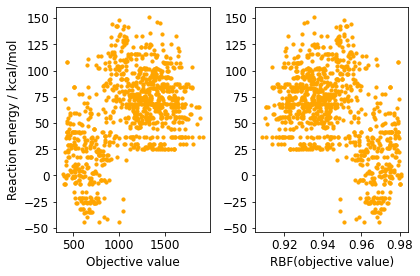

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(soap_out["ObjValNoPen"], soap_out["energies / kcal/mol"], s=10, color='orange')
ax[0].set_xlabel("Objective value")
ax[0].set_ylabel("Reaction energy / kcal/mol")

x = np.exp(-soap_out["ObjValNoPen"]/(2*100**2))
ax[1].scatter(x, soap_out["energies / kcal/mol"], s=10, color='orange')
ax[1].set_xlabel("RBF(objective value)")

plt.tight_layout()
plt.savefig("../figures/correlation-soap.png", dpi=300)
plt.show()